In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mobiles.csv")

Roteiro:
correlacao entre colunas
escolher colunas 
teste para quantidade de clusters
clusters com essa quantia

In [12]:
for i in df.dtypes.items():
    print(i)

('Unnamed: 0', dtype('int64'))
('Brand', dtype('O'))
('Title', dtype('O'))
('Model Name', dtype('O'))
('Model Number', dtype('O'))
('Price', dtype('int64'))
('Rating', dtype('float64'))
('No_of_Ratings', dtype('float64'))
('No_of_Reviews', dtype('float64'))
('In The Box', dtype('O'))
('Color', dtype('O'))
('Browse Type', dtype('O'))
('SIM Type', dtype('O'))
('Hybrid Sim Slot', dtype('O'))
('Touchscreen', dtype('O'))
('OTG Compatible', dtype('O'))
('Quick Charging', dtype('O'))
('Sound Enhancements', dtype('O'))
('Display_size_cm', dtype('float64'))
('Display_size_inches', dtype('float64'))
('Resolution', dtype('O'))
('Resolution Type', dtype('O'))
('Display Type', dtype('O'))
('Other Display Features', dtype('O'))
('Operating System', dtype('O'))
('Processor Type', dtype('O'))
('Processor Core', dtype('O'))
('Operating Frequency', dtype('O'))
('Internal Storage', dtype('O'))
('Primary Camera Available', dtype('O'))
('Primary Camera', dtype('O'))
('Primary Camera Features', dtype('O'))


<AxesSubplot:>

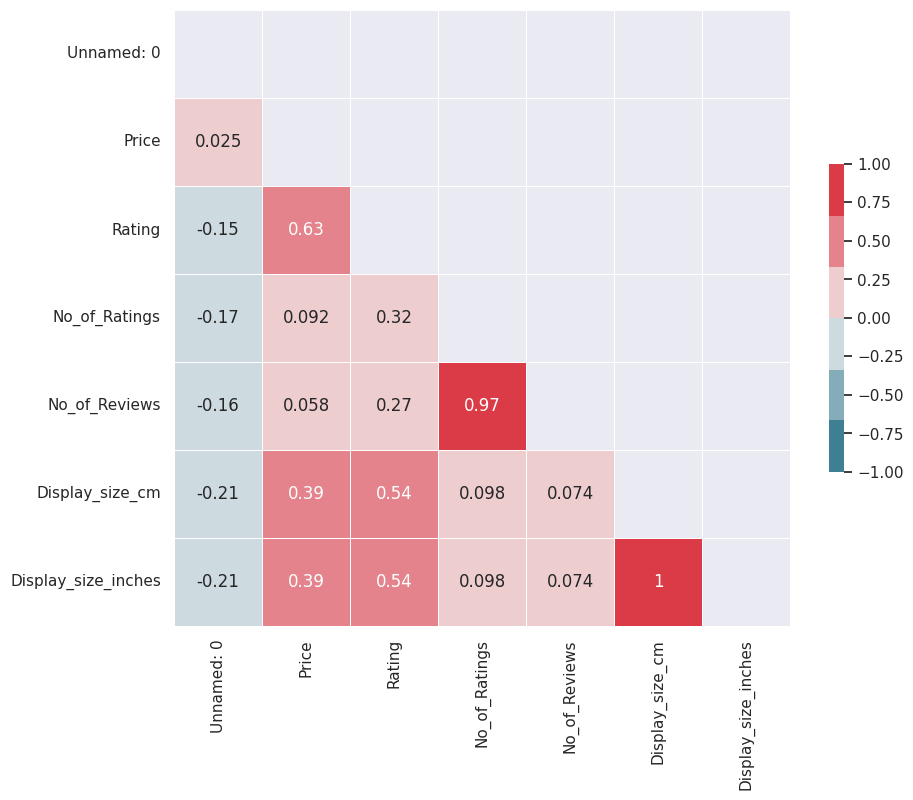

In [13]:
#method{‘pearson’, ‘kendall’, ‘spearman’}
corr = df.corr(method="pearson")
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True
cmap = sns.diverging_palette(220, 10)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap,
vmax=1, vmin=-1, center=0, square=True,
linewidth=.5,cbar_kws={"shrink":.5})

In [26]:
display(df.Price.max())
display(df.Price.min())
display(df.Rating.max())
display(df.Rating.min())

199900

597

5.0

2.9

In [56]:
min_values = df.Price.min(axis=0)
max_values = df.Price.max(axis=0)
# Normalizar os dados usando a fórmula de normalização min-max
preco = (df.Price - min_values) / (max_values - min_values)
preco

0      0.260418
1      0.029613
2      0.083285
3      0.077279
4      0.072262
         ...   
979    0.257909
980    0.067244
981    0.061680
982    0.050687
983    0.071966
Name: Price, Length: 984, dtype: float64

In [57]:
min_values = df.Rating.min(axis=0)
max_values = df.Rating.max(axis=0)
# Normalizar os dados usando a fórmula de normalização min-max
rat = (df.Rating - min_values) / (max_values - min_values)
rat

0      0.857143
1      0.571429
2      0.714286
3      0.666667
4      0.714286
         ...   
979    0.809524
980    0.571429
981    0.666667
982    0.619048
983    0.571429
Name: Rating, Length: 984, dtype: float64

In [58]:
df1 = pd.concat([preco, rat], axis=1)
df1

,Price,Rating
0,0.260418,0.857143
1,0.029613,0.571429
2,0.083285,0.714286
3,0.077279,0.666667
4,0.072262,0.714286
...,...,...
979,0.257909,0.809524
980,0.067244,0.571429
981,0.061680,0.666667
982,0.050687,0.619048


Text(0.5, 1.0, 'Elbow curve')

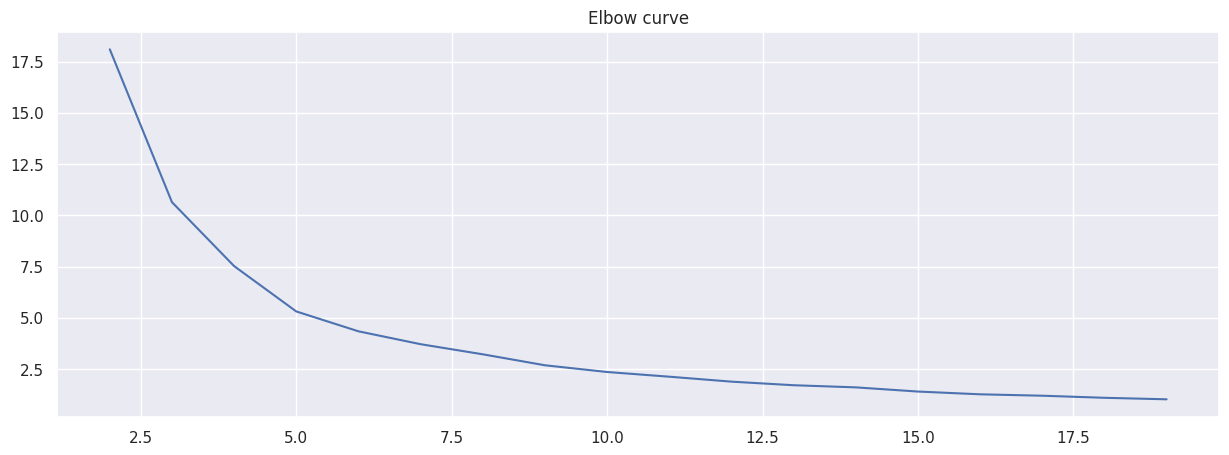

In [59]:
X = df1
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init = 10)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'silhouette')

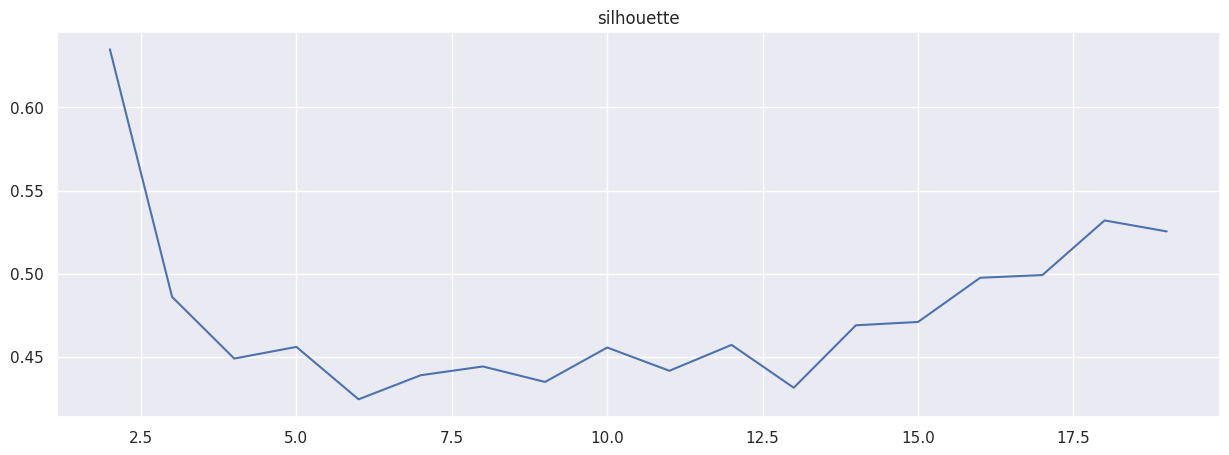

In [37]:
X = df1
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init = 10)
    fitted = kmeans.fit(X)
    distorsions.append(silhouette_score(df1, fitted.labels_))

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('silhouette')

3 parece o melhor

In [41]:
from sklearn.mixture import GaussianMixture
nb_components = [2, 3, 4, 5, 6, 7, 8]
aics = []
bics = []
for n in nb_components:
    gm = GaussianMixture(n_components=n, max_iter=1000, random_state=1000)
    gm.fit(X)
    aics.append(gm.aic(X))
    bics.append(gm.bic(X))

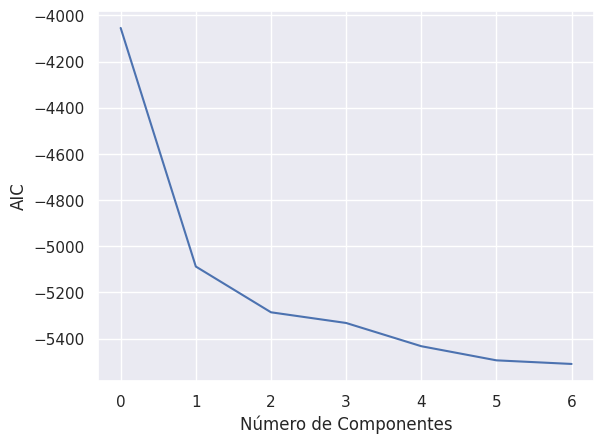

In [42]:
plt_aics = plt.figure()
plt.plot(aics)
plt.xlabel("Número de Componentes")
plt.ylabel("AIC")
plt.show()

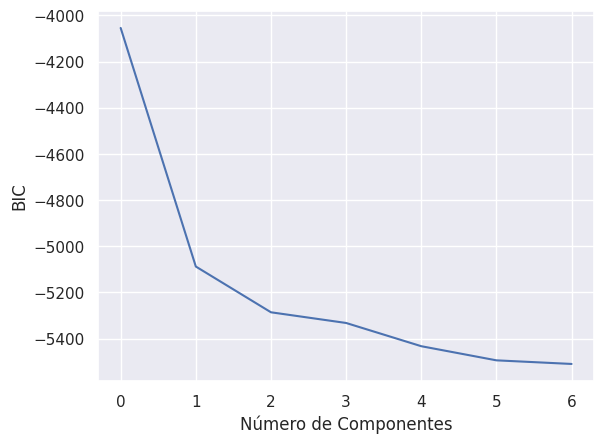

In [43]:
plt_aics = plt.figure()
plt.plot(aics)
plt.xlabel("Número de Componentes")
plt.ylabel("BIC")
plt.show()

In [74]:
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(df1)

clusters_labels = kmeans.labels_

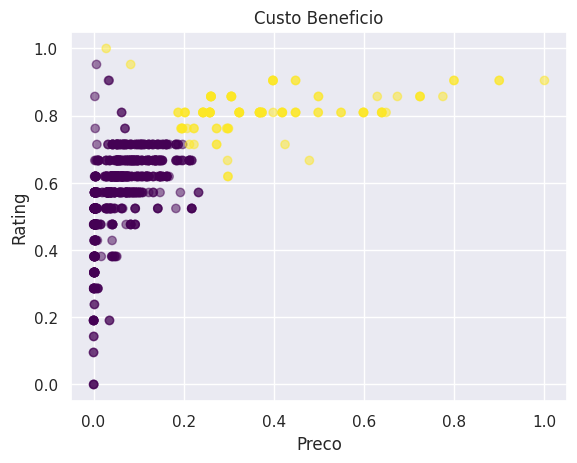

In [75]:
x = df1.Price
y = df1.Rating

plt.scatter(x, y, c=clusters_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Preco')
plt.ylabel('Rating')
plt.title('Custo Beneficio')
plt.show()

In [76]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(df1)

clusters_labels = kmeans.labels_

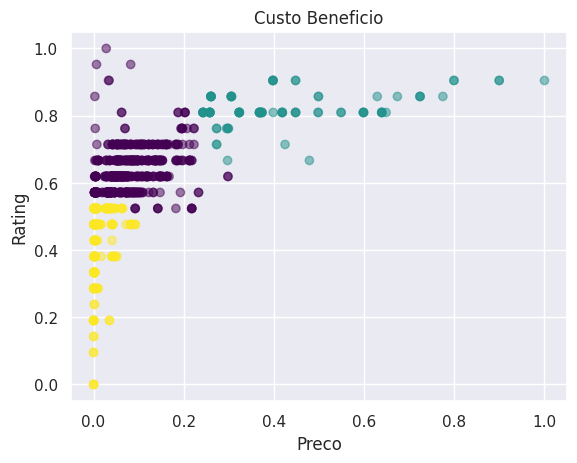

In [77]:
x = df1.Price
y = df1.Rating

plt.scatter(x, y, c=clusters_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Preco')
plt.ylabel('Rating')
plt.title('Custo Beneficio')
plt.show()

In [81]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.5)
dbsy = dbs.fit_predict(df1)

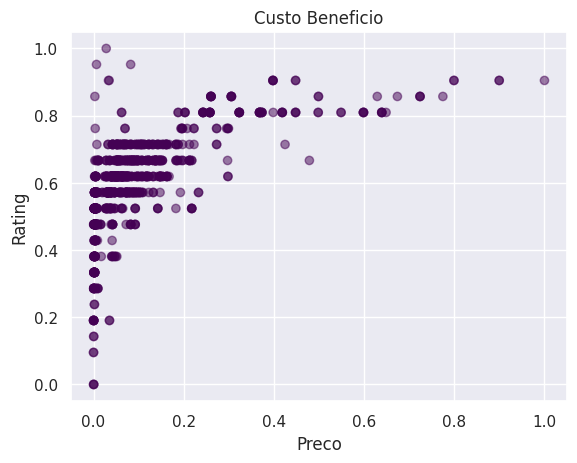

In [82]:
plt.scatter(x, y, c=dbsy, cmap='viridis', alpha=0.5)
plt.xlabel('Preco')
plt.ylabel('Rating')
plt.title('Custo Beneficio')
plt.show()